Build the linear regression model using scikit learn in boston data to predict
'Price' based on other dependent variable.

Here is the code to load the data:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_boston
boston = load_boston()
bos = pd.DataFrame(boston.data)

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_boston
boston = load_boston()
bos = pd.DataFrame(boston.data)

In [2]:
bos

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [3]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
print(boston.feature_names.shape)
print(boston.feature_names)

(13,)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [5]:
boston.filename

'C:\\Users\\manoj\\Anaconda3\\lib\\site-packages\\sklearn\\datasets\\data\\boston_house_prices.csv'

In [6]:
print(boston.target.shape)
boston.target

(506,)


array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [7]:
bos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
0     506 non-null float64
1     506 non-null float64
2     506 non-null float64
3     506 non-null float64
4     506 non-null float64
5     506 non-null float64
6     506 non-null float64
7     506 non-null float64
8     506 non-null float64
9     506 non-null float64
10    506 non-null float64
11    506 non-null float64
12    506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


In [8]:
bos.isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
dtype: int64

In [9]:
X=pd.DataFrame(boston.data,columns=boston.feature_names)
y=pd.DataFrame(boston.target,columns=['MEDV'])
#y=y.rename(columns={"MEDV": "label"})
print(X)
y

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       1

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


Text(0, 0.5, 'Y Axis')

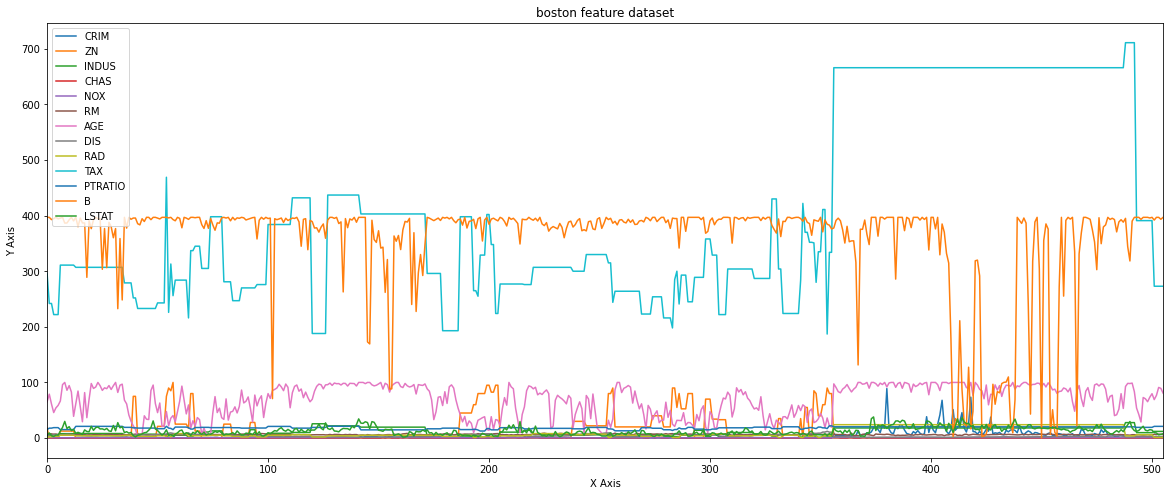

In [10]:
ax = X.plot(figsize=(20,8), title='boston feature dataset')
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')

Text(0, 0.5, 'Y Axis')

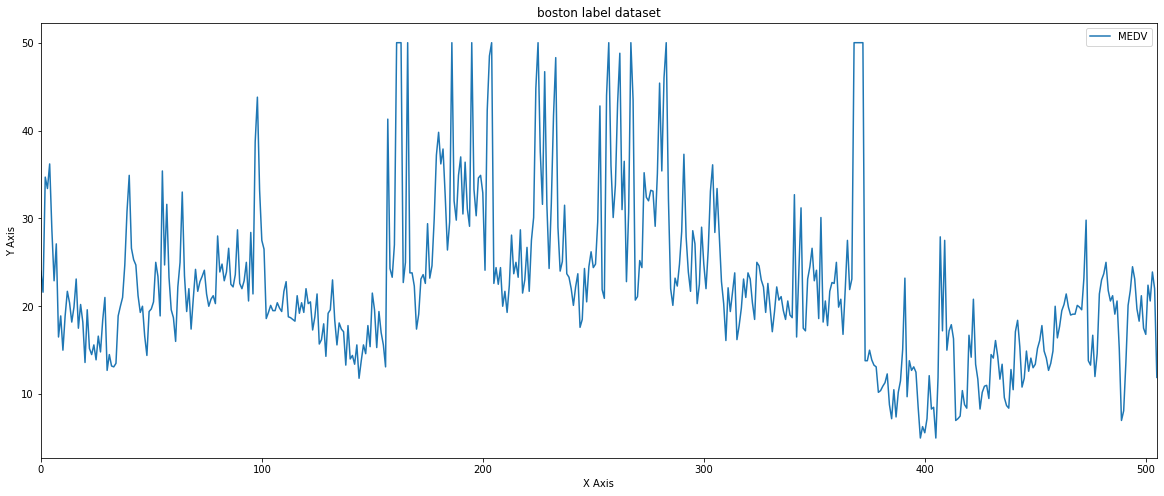

In [11]:
ax = y.plot(figsize=(20,8), title='boston label dataset')
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')

In [12]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(X,y,test_size=0.3,random_state=1)

In [14]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm=lm.fit(train_x,train_y)

In [15]:
pred_y=lm.predict(test_x)

In [16]:
pred_y

array([[32.3914647 ],
       [27.94401279],
       [17.83762764],
       [21.66941388],
       [18.93639614],
       [20.01995795],
       [32.63414961],
       [17.86179976],
       [24.73211676],
       [26.77346826],
       [27.26138023],
       [28.63243014],
       [21.16103038],
       [27.15098589],
       [23.33198614],
       [21.02894005],
       [17.11819755],
       [37.52455938],
       [30.69864427],
       [ 8.46104486],
       [20.83966032],
       [16.26732451],
       [25.05030307],
       [24.8069032 ],
       [31.6789299 ],
       [10.98989363],
       [13.54111562],
       [16.54697099],
       [35.86699683],
       [14.69589266],
       [21.05655107],
       [13.90301353],
       [43.01321262],
       [17.80335305],
       [21.68817023],
       [20.45077825],
       [17.38095983],
       [26.81334904],
       [10.08706217],
       [19.96174586],
       [24.1983249 ],
       [21.00202622],
       [29.38682967],
       [16.33215467],
       [19.37439646],
       [14

In [17]:
import numpy as np
np.mean((pred_y-test_y)**2)

MEDV    19.831324
dtype: float64

In [18]:
lm.score(train_x,train_y)


0.7103879080674731

In [ ]:
### R-squared >=0.85 -BEST FIT
### R-squared>=0.7 -GOOD FIT
### R-squared>=0.5 -poor fit
 as the value of r here is .71 so this is good fit model

In [19]:
print(lm.intercept_)
print(lm.coef_)

[46.39649387]
[[-9.85424717e-02  6.07841138e-02  5.91715401e-02  2.43955988e+00
  -2.14699650e+01  2.79581385e+00  3.57459778e-03 -1.51627218e+00
   3.07541745e-01 -1.12800166e-02 -1.00546640e+00  6.45018446e-03
  -5.68834539e-01]]
